In [54]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
import pandas as pd

In [2]:
train_images.shape

(60000, 28, 28)

In [30]:
s = pd.Series(train_labels)
s.describe()
print(s.max())
print(s.min())

9
0


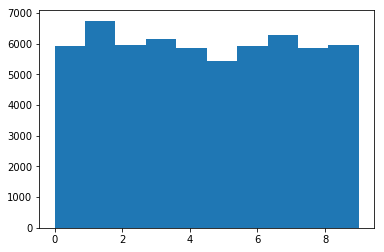

In [29]:
import matplotlib.pyplot as plt 

plt.hist(s, bins=10)
plt.show()

In [41]:
from keras import models
from keras import layers

def getModel():
    network = models.Sequential()
    network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='rmsprop', 
                    loss='categorical_crossentropy',
                    metrics=['acc'])
    return network

def preprocessing(train_images, test_images):
    t = train_images.reshape((train_images.shape[0], 
                                         train_images.shape[1] * train_images.shape[2]))
    t = t.astype('float32') / 255
    
    tt = test_images.reshape((test_images.shape[0], 
                                       test_images.shape[1]* test_images.shape[2]))
    tt = tt.astype('float32') / 255
    
    return t, tt

In [55]:
from keras.utils import to_categorical
# one hot encoding transformation
# [0, 1, 2, 3, 4 ...] (60000, )=> (60000, 10)
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

In [56]:
n = getModel()
t, tt = preprocessing(train_images, test_images)
n.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [57]:
n.fit(t, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2585 - acc: 0.9256
Epoch 2/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.1050 - acc: 0.9694
Epoch 3/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.0697 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.0510 - acc: 0.9842
Epoch 5/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.0379 - acc: 0.9890


In [59]:
test_loss, test_acc = n.evaluate(tt, test_labels)

10000/10000 [==============================] - 0s 30us/step


In [60]:
print(test_loss)
print(test_acc)

0.07155414377948037
0.9788


In [74]:
n.predict(t[0][:])

ValueError: Error when checking input: expected dense_19_input to have shape (784,) but got array with shape (1,)

In [69]:
t[0, :].shape

(784,)